In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
data = pd.read_csv('data.csv', header =None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,SMALL
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,SMALL
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,SMALL
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,SMALL


# Normalize data

Split data into categorical and numerical so that we can normalize the numerical data.  

In [4]:
x = data.iloc[:,[0,2,4,10,11,12]].values.astype(float)
y = data.iloc[:,[1,3,5,6,7,8,9,13,14]]

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_numeric = pd.DataFrame(x_scaled)

In [6]:
cats = [1,3,5,6,7,8,9,13]

In [7]:
df_cats = pd.get_dummies(y, columns = cats, drop_first = True)

In [8]:
df_numeric.head()

,0,1,2,3,4,5
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [9]:
df_cats.head()

,14,1_A0,1_A1,1_A2,1_A3,1_A4,1_A6,1_A7,1_A8,3_B1,...,13_H37,13_H38,13_H39,13_H40,13_H41,13_H5,13_H6,13_H7,13_H8,13_H9
0,SMALL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SMALL,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SMALL,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,SMALL,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SMALL,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_norm = df_numeric.merge(df_cats, left_index= True, right_index = True)

In [11]:
data_norm.head()

,0,1,2,3,4,5,14,1_A0,1_A1,1_A2,...,13_H37,13_H38,13_H39,13_H40,13_H41,13_H5,13_H6,13_H7,13_H8,13_H9
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,SMALL,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,SMALL,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,SMALL,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,SMALL,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,SMALL,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Get dummy variables of all categorical features.  It may also be of interest to convert these to numeric, but for now I'm just going to make them binary features.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data_norm.drop(14, axis = 1)
Y = data_norm[14]

In [14]:
X.head()

,0,1,2,3,4,5,1_A0,1_A1,1_A2,1_A3,...,13_H37,13_H38,13_H39,13_H40,13_H41,13_H5,13_H6,13_H7,13_H8,13_H9
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 101)

Get base estimate if we just guess the more common size, small vs large

In [16]:
count_small = Y_test[Y_test == "SMALL"].count()
count_large = Y_test[Y_test == "LARGE"].count()
count = Y_test.count()

If we always guessed small with the test data, our accuracy would be equal to 0.745165

In [17]:
print (count_small/count)

0.7611833350394104


# UPDATE to Data

In [18]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,SMALL
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,SMALL
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,SMALL
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,SMALL


In [19]:
df = pd.get_dummies(data, columns = [1,3,5,6,7,8,9,13], drop_first = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 101 entries, 0 to 13_H9
dtypes: int64(6), object(1), uint8(94)
memory usage: 4.7+ MB


In [21]:
df.insert(11,'1_A5', 0)
df.insert(39,'6_D11', 0)
df.insert(96,'13_H4', 0)

In [22]:
X_nn = df.drop(14, axis = 1)
Y_nn = df[14]

In [23]:
X_train_nn, X_test_nn , Y_train_nn, Y_test_nn = train_test_split(X_nn,Y_nn, test_size = 0.3, random_state = 101)

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,Y_train)
predictions = dtree.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(confusion_matrix(Y_test,predictions))

[[1522  811]
 [ 984 6452]]


In [30]:
print (classification_report(Y_test,predictions))

              precision    recall  f1-score   support

       LARGE       0.61      0.65      0.63      2333
       SMALL       0.89      0.87      0.88      7436

    accuracy                           0.82      9769
   macro avg       0.75      0.76      0.75      9769
weighted avg       0.82      0.82      0.82      9769



In [31]:
#error rate
print ((confusion_matrix(Y_test,predictions)[0][1]+confusion_matrix(Y_test,predictions)[1][0])/count)

0.18374449790152522


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rfc = RandomForestClassifier(random_state = 42)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfc, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_nn, Y_train_nn)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 27.5min finished


In [25]:
bestF.get_params()

{'cv': 3,
 'error_score': 'raise-deprecating',
 'estimator__bootstrap': True,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 'warn',
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, 

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy')
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
rfc_pred = bestF.predict(X_test_nn)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(Y_test_nn,rfc_pred))

[[1461  872]
 [ 420 7016]]


In [29]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

       LARGE       0.78      0.63      0.69      2333
       SMALL       0.89      0.94      0.92      7436

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769



In [30]:
#error rate
print ((confusion_matrix(Y_test,rfc_pred)[0][1]+confusion_matrix(Y_test,rfc_pred)[1][0])/count)

0.1322550926399836


# Tune DT 
## max_depth

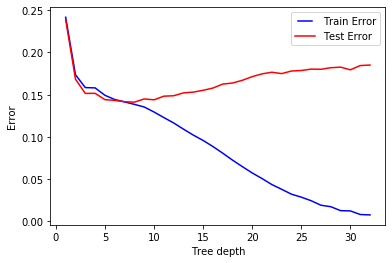

In [46]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dtree = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
    dtree.fit(X_train, Y_train)
    train_pred = dtree.predict(X_train)
   
    train_results.append(((confusion_matrix(Y_train,train_pred)[0][1]+confusion_matrix(Y_train,train_pred)[1][0])/Y_train.count()))
   

    y_pred = dtree.predict(X_test)
    
    test_results.append(((confusion_matrix(Y_test,y_pred)[0][1]+confusion_matrix(Y_test,y_pred)[1][0])/count))

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label= 'Train Error')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Tree depth')
plt.show()

In [47]:
print (test_results)

[0.23881666496058962, 0.16828743986078412, 0.15149964172382024, 0.15160200634660662, 0.14412938888320195, 0.1432081072781247, 0.1416726379363292, 0.14116081482239737, 0.1449483058654929, 0.14392465963762924, 0.14822397379465657, 0.1487357969085884, 0.15211382946053845, 0.15303511106561574, 0.15518476814412938, 0.15784624833657487, 0.16255502098474767, 0.16378339645818404, 0.16705906438734774, 0.17135837854437505, 0.17463404647353875, 0.17657897430647967, 0.17494114034189784, 0.1780120790254888, 0.17862626676220697, 0.18026410072678883, 0.1800593714812161, 0.18190193469137067, 0.18261848705087522, 0.1794451837444979, 0.1844610502610298, 0.18507523799774797]


Optimal max_depth value = 7

## min_sample_split

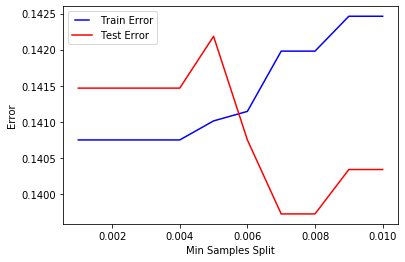

In [48]:
min_samples_splits = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]#np.linspace(0.0, 0.1, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dtree = DecisionTreeClassifier(max_depth = 10,min_samples_leaf=0.002,min_samples_split=min_samples_split,random_state=42)
    dtree.fit(X_train, Y_train)
    train_pred = dtree.predict(X_train)
   
    train_results.append(((confusion_matrix(Y_train,train_pred)[0][1]+confusion_matrix(Y_train,train_pred)[1][0])/Y_train.count()))
   

    y_pred = dtree.predict(X_test)
    
    test_results.append(((confusion_matrix(Y_test,y_pred)[0][1]+confusion_matrix(Y_test,y_pred)[1][0])/count))

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label= 'Train Error')
line2, = plt.plot(min_samples_splits, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Min Samples Split')
plt.show()

Optimal min_sample_split seems to be 0.007, could cause underfitting though

## min_sample_leafs

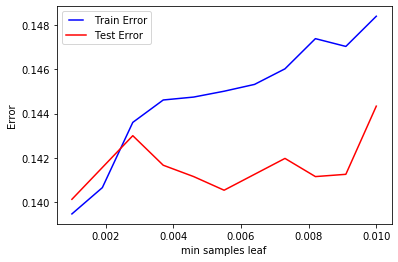

In [49]:
min_samples_leafs = np.linspace(0.001, 0.01, 11, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(max_depth = 10,min_samples_leaf=min_samples_leaf,random_state=42)
    dt.fit(X_train, Y_train)
    
    train_pred = dt.predict(X_train)
    train_results.append(((confusion_matrix(Y_train,train_pred)[0][1]+confusion_matrix(Y_train,train_pred)[1][0])/Y_train.count()))
   

    y_pred = dt.predict(X_test)
    test_results.append(((confusion_matrix(Y_test,y_pred)[0][1]+confusion_matrix(Y_test,y_pred)[1][0])/count))


line1, = plt.plot(min_samples_leafs, train_results, 'b', label= 'Train Error')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('min samples leaf')
plt.show()

Increasing this parameter could cause overfitting

## Max Features

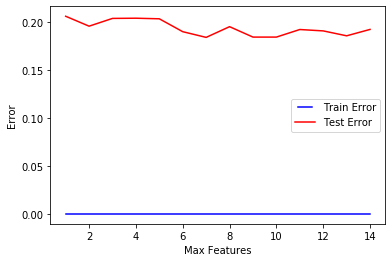

In [50]:
max_features = list(range(1,data.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature,random_state=42)
    dt.fit(X_train, Y_train)
    
    train_pred = dt.predict(X_train)
    train_results.append(((confusion_matrix(Y_train,train_pred)[0][1]+confusion_matrix(Y_train,train_pred)[1][0])/Y_train.count()))
   

    y_pred = dt.predict(X_test)
    test_results.append(((confusion_matrix(Y_test,y_pred)[0][1]+confusion_matrix(Y_test,y_pred)[1][0])/count))


line1, = plt.plot(max_features, train_results, 'b', label= 'Train Error')
line2, = plt.plot(max_features, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Max Features')
plt.show()

# Tune RF 
## n_estimators

In [51]:
max_depths = np.linspace(100, 1000, 20, endpoint=True)
train_resultsRF = []
test_resultsRF = []
for max_depth in max_depths:
    rfc = RandomForestClassifier(n_estimators=200, criterion='entropy')
    rfc.fit(X_train, Y_train)
    train_rfc_pred = rfc.predict(X_test)
   
    train_resultsRF.append(((confusion_matrix(Y_train,train_rfc_pred)[0][1]+confusion_matrix(Y_train,train_rfc_pred)[1][0])/Y_train.count()))
   

    y_predRF = rfc.predict(X_test)
    
    test_resultsRF.append(((confusion_matrix(Y_test,y_predRF)[0][1]+confusion_matrix(Y_test,y_predRF)[1][0])/count))

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_resultsRF, 'b', label= 'Train Error')
line2, = plt.plot(max_depths, test_resultsRF, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Tree depth')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [22792, 9769]

In [ ]:
print (test_resultsRF)

## Max Features

In [ ]:
max_features = list(range(1,data.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature,random_state=42)
    dt.fit(X_train, Y_train)
    
    train_pred = dt.predict(X_train)
    train_results.append(((confusion_matrix(Y_train,train_pred)[0][1]+confusion_matrix(Y_train,train_pred)[1][0])/Y_train.count()))
   

    y_pred = dt.predict(X_test)
    test_results.append(((confusion_matrix(Y_test,y_pred)[0][1]+confusion_matrix(Y_test,y_pred)[1][0])/count))


line1, = plt.plot(max_features, train_results, 'b', label= 'Train Error')
line2, = plt.plot(max_features, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Max Features')
plt.show()

# Final Decision Tree Model

In [257]:
dtree_final = DecisionTreeClassifier(max_depth = 10,min_samples_leaf=0.001,min_samples_split=0.007,random_state=42)
dtree_final.fit(X_train,Y_train)
final_predictions = dtree_final.predict(X_test)

In [258]:
print (classification_report(Y_test,final_predictions))

              precision    recall  f1-score   support

       LARGE       0.78      0.58      0.66      2333
       SMALL       0.88      0.95      0.91      7436

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [259]:
#error rate
test_error =  ((confusion_matrix(Y_test,final_predictions)[0][1]+confusion_matrix(Y_test,final_predictions)[1][0])/count)
print (test_error)

0.13921588698945644


# Final Random Forest Model

In [61]:
rfcFinal = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfcFinal.fit(X_train, Y_train)
final_predictionsFinal = rfcFinal.predict(X_test)

In [62]:
print (classification_report(Y_test,final_predictionsFinal))

              precision    recall  f1-score   support

       LARGE       0.73      0.65      0.68      2333
       SMALL       0.89      0.92      0.91      7436

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.85      0.86      0.85      9769



In [63]:
#error rate
test_errorRF =  ((confusion_matrix(Y_test,final_predictionsFinal)[0][1]+confusion_matrix(Y_test,final_predictionsFinal)[1][0])/count)
print (test_errorRF)

0.14238919029583377


## Compare model with normalized data to model if data is not normalized

In [199]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,SMALL
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,SMALL
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,SMALL
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,SMALL


In [200]:
df = pd.get_dummies(data, columns = [1,3,4,5,6,7,8,9,13], drop_first = True)

In [201]:
X_nn = data_norm.drop(14, axis = 1)
Y_nn = data_norm[14]

In [202]:
X_train_nn, X_test_nn , Y_train_nn, Y_test_nn = train_test_split(X_nn,Y_nn, test_size = 0.3, random_state = 101)

In [254]:
dtree_nn = DecisionTreeClassifier(max_depth = 10,min_samples_leaf=0.001,min_samples_split=0.007, random_state=42)
dtree_nn.fit(X_train_nn,Y_train_nn)
predictions_nn = dtree_nn.predict(X_test_nn)

In [255]:
print (classification_report(Y_test_nn,predictions_nn))

              precision    recall  f1-score   support

       LARGE       0.78      0.58      0.66      2333
       SMALL       0.88      0.95      0.91      7436

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [256]:
#error rate
test_error_nn =  ((confusion_matrix(Y_test,predictions_nn)[0][1]+confusion_matrix(Y_test_nn,predictions_nn)[1][0])/count)
print (test_error_nn)

0.13921588698945644


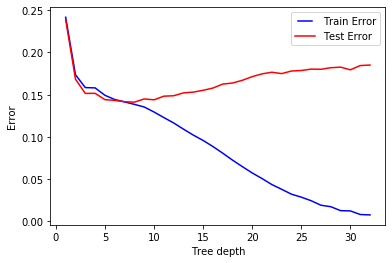

In [206]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dtree = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
    dtree.fit(X_train_nn, Y_train_nn)
    train_pred = dtree.predict(X_train_nn)
   
    train_results.append(((confusion_matrix(Y_train_nn,train_pred)[0][1]+confusion_matrix(Y_train_nn,train_pred)[1][0])/Y_train_nn.count()))
   

    y_pred = dtree.predict(X_test_nn)
    
    test_results.append(((confusion_matrix(Y_test_nn,y_pred)[0][1]+confusion_matrix(Y_test_nn,y_pred)[1][0])/count))

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label= 'Train Error')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Tree depth')
plt.show()

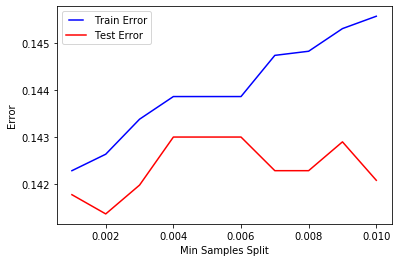

In [227]:
min_samples_splits = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]#np.linspace(0.0, 0.1, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dtree = DecisionTreeClassifier(max_depth = 7,min_samples_split=min_samples_split,random_state=42)
    dtree.fit(X_train_nn, Y_train_nn)
    train_pred = dtree.predict(X_train_nn)
   
    train_results.append(((confusion_matrix(Y_train_nn,train_pred)[0][1]+confusion_matrix(Y_train_nn,train_pred)[1][0])/Y_train_nn.count()))
   

    y_pred = dtree.predict(X_test_nn)
    
    test_results.append(((confusion_matrix(Y_test_nn,y_pred)[0][1]+confusion_matrix(Y_test_nn,y_pred)[1][0])/count))

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label= 'Train Error')
line2, = plt.plot(min_samples_splits, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Min Samples Split')
plt.show()

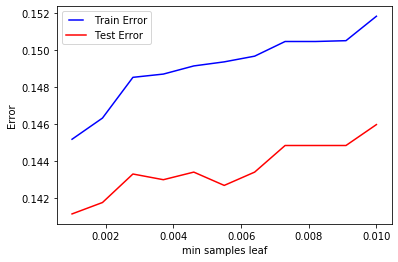

In [236]:
min_samples_leafs = np.linspace(0.001, 0.01, 11, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(max_depth = 7,min_samples_split=0.007,min_samples_leaf=min_samples_leaf,random_state=42)
    dt.fit(X_train_nn, Y_train_nn)
    
    train_pred = dt.predict(X_train_nn)
    train_results.append(((confusion_matrix(Y_train_nn,train_pred)[0][1]+confusion_matrix(Y_train_nn,train_pred)[1][0])/Y_train_nn.count()))
   

    y_pred = dt.predict(X_test_nn)
    test_results.append(((confusion_matrix(Y_test_nn,y_pred)[0][1]+confusion_matrix(Y_test_nn,y_pred)[1][0])/count))


line1, = plt.plot(min_samples_leafs, train_results, 'b', label= 'Train Error')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('min samples leaf')
plt.show()

# Compare normalized to not normalized

In [260]:
print ('Not Normalized Data Testing Error: ' + str(test_error_nn))
print ('Normalized Data Testing Error: ' + str(test_error))

Not Normalized Data Testing Error: 0.13921588698945644
Normalized Data Testing Error: 0.13921588698945644


# Classify Futures

In [31]:
futures = pd.read_csv('futures.csv',header=None)


In [32]:
futures_final = pd.get_dummies(futures, columns = [1,3,5,6,7,8,9,13], drop_first = True)

In [33]:
futures_final.insert(8,'1_A2',0)
futures_final.insert(44,'6_D3',0)
futures_final.insert(62,'13_H1',0)
futures_final.insert(97,'13_H41',0)

In [34]:
futures_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7684 entries, 0 to 7683
Columns: 103 entries, 0 to 13_H9
dtypes: int64(10), uint8(93)
memory usage: 1.3 MB


In [36]:
# Train using the final model on normalized data
futures_predictions = bestF.predict(futures_final)

In [37]:
futures_predictions_df = pd.DataFrame(futures_predictions)

# Futures with predicted labels

In [38]:
futures_with_pred = futures.merge(futures_predictions_df,left_index = True, right_index = True)

In [39]:
futures_with_pred.head()

,0_x,1,2,3,4,5,6,7,8,9,10,11,12,13,0_y
0,38,A0,89814,B1,9,C1,D1,E1,F1,G0,0,0,50,H0,SMALL
1,28,A1,336951,B2,12,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
2,44,A0,160323,B3,10,C1,D0,E1,F0,G0,7688,0,40,H0,LARGE
3,18,?,103497,B3,10,C0,?,E0,F1,G1,0,0,30,H0,SMALL
4,63,A3,104626,B5,15,C1,D5,E1,F1,G0,3103,0,32,H0,LARGE
